# Student Result Analysis

    # Installing the pakages of these libraries
    # then import these libraries in the editor

In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# importing the dataset from the system

df = pd.read_csv("Expanded_data_with_more_features.csv")
print(df.head())

   Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0           0  female         NaN   bachelor's degree      standard     none   
1           1  female     group C        some college      standard      NaN   
2           2  female     group B     master's degree      standard     none   
3           3    male     group A  associate's degree  free/reduced     none   
4           4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  W

# Taking Information of data:

In [18]:
df.describe()
#this will describe the numeric coloumns of the csv file.

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [22]:
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

# Drop Unnamed Coloumn (HERE, We are Transforming the data for Our Requirments)

In [26]:
df = df.drop("Unnamed: 0", axis =1)
print(df.head())


   Gender EthnicGroup          ParentEduc     LunchType TestPrep  \
0  female         NaN   bachelor's degree      standard     none   
1  female     group C        some college      standard      NaN   
2  female     group B     master's degree      standard     none   
3    male     group A  associate's degree  free/reduced     none   
4    male     group C        some college      standard     none   

  ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings TransportMeans  \
0             married     regularly          yes         3.0     school_bus   
1             married     sometimes          yes         0.0            NaN   
2              single     sometimes          yes         4.0     school_bus   
3             married         never           no         1.0            NaN   
4             married     sometimes          yes         0.0     school_bus   

  WklyStudyHours  MathScore  ReadingScore  WritingScore  
0            < 5         71            71            74  


      # change Weekly study hours coloumn`

In [28]:
df["WklyStudyHours"] = df["WklyStudyHours"].str.replace("05-Oct","5 - 10")
df.head

<bound method NDFrame.head of        Gender EthnicGroup          ParentEduc     LunchType   TestPrep  \
0      female         NaN   bachelor's degree      standard       none   
1      female     group C        some college      standard        NaN   
2      female     group B     master's degree      standard       none   
3        male     group A  associate's degree  free/reduced       none   
4        male     group C        some college      standard       none   
...       ...         ...                 ...           ...        ...   
30636  female     group D         high school      standard       none   
30637    male     group E         high school      standard       none   
30638  female         NaN         high school  free/reduced  completed   
30639  female     group D  associate's degree      standard  completed   
30640    male     group B        some college      standard       none   

      ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings  \
0            

# Now the proper Analysis Starts for chart building after all transformations.

# Gender Distribution

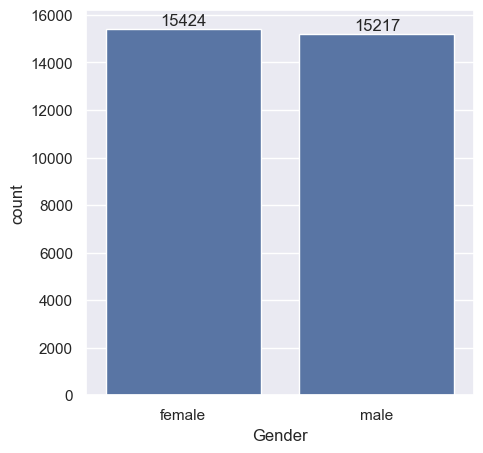

In [51]:
# Seaborn plot for counting values
plt.figure(figsize = (5,5))
sns.set(font_scale=1.0)
ax = sns.countplot(data = df, x = "Gender")
ax.bar_label(ax.containers[0])
plt.show()

    # From above chart we have analysed that:
    # the number of females is more than the number of males.

 # ParentEducation distribution

In [55]:
gb = df.groupby("ParentEduc").agg({"MathScore":"mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


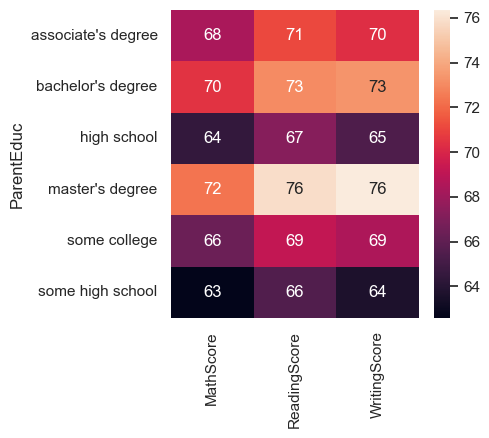

In [63]:
# uk whenever we see this kind of string and numeric comparison, there HeatMap is good
# good option for comparison.
plt.figure(figsize = (4,4))
sns.heatmap(gb, annot = True)
plt.show()

     # From the above chart we have concluded that the parents have a good impact on there childrens.

# ParentMaritalStatus Distribution

In [77]:
gb1 = df.groupby("ParentMaritalStatus").agg({"MathScore":"mean", "ReadingScore": "mean", "WritingScore": "mean"})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


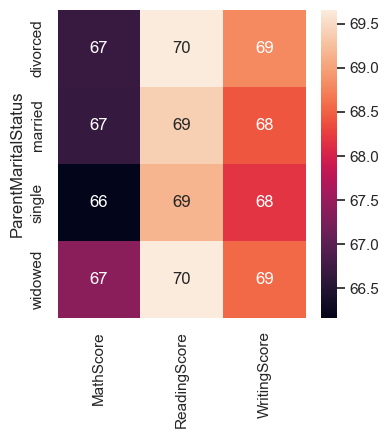

In [69]:
plt.figure(figsize = (4,4))
sns.heatmap(gb1, annot = True)
plt.show()

    # from the above chart, we have concluded. There is No/Neglegible Impact of ParentMaritalStatus onb childrens Education.

# Outlier's Checking 

In [94]:
# for checking the outliers in Maths score, writing and reading one.
# Box Plot can be used.

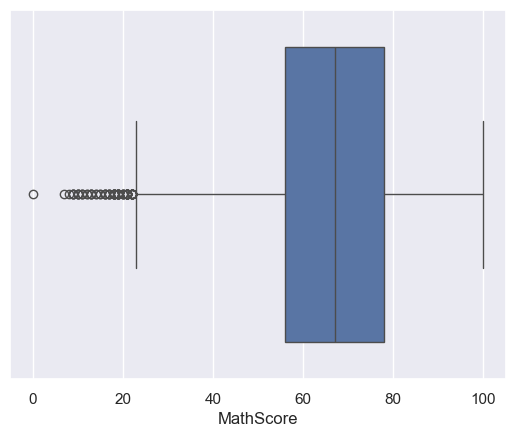

In [100]:
sns.boxplot(data =df, x = "MathScore")
plt.show()

     # from above we can see that there are many Outlier's in mathscore i.e Before ~22 Marks
     # In Box plot, there is IQR-Inter quaterial region i.e the blue box where mid line is median
     # and there are two extreme black lines which shows min and max values.

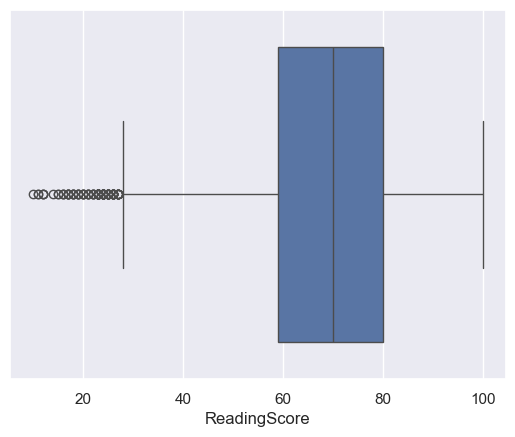

In [104]:
sns.boxplot(data =df, x = "ReadingScore")
plt.show()

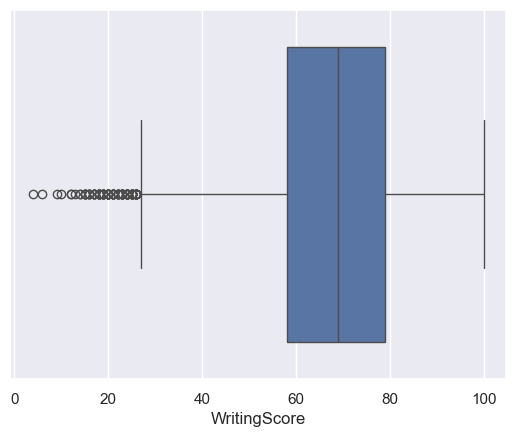

In [106]:
sns.boxplot(data =df, x = "WritingScore")
plt.show()

 # Ethnic Group Distribution

In [109]:
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


      # Here we want to find the count of peeps with Count Plot by .loc of panda lib.
      # Also For Percentage distribution Always use Pie charts.

In [118]:
GroupA = df.loc[(df["EthnicGroup"] == "group A")].count()
print(GroupA)

Gender                 2219
EthnicGroup            2219
ParentEduc             2078
LunchType              2219
TestPrep               2081
ParentMaritalStatus    2121
PracticeSport          2167
IsFirstChild           2168
NrSiblings             2096
TransportMeans         1999
WklyStudyHours         2146
MathScore              2219
ReadingScore           2219
WritingScore           2219
dtype: int64


In [166]:
"""GroupA = df.loc[(df["EthnicGroup"] == "group A")].count()
GroupB = df.loc[(df["EthnicGroup"] == "group B")].count()
GroupC = df.loc[(df["EthnicGroup"] == "group C")].count()
GroupD = df.loc[(df["EthnicGroup"] == "group D")].count()
GroupE = df.loc[(df["EthnicGroup"] == "group E")].count()

l = ["groupA, groupB, groupC, groupD, groupE"]
mlist = [group A["EthnicGroup"], group B["EthnicGroup"], group C["EthnicGroup"], group D["EthnicGroup"], group E["EthnicGroup"]]
plt.pie(mlist,labels = 1, autopct = "%1.2f%%")
plt.show() This was my early method which gave some error"""

'GroupA = df.loc[(df["EthnicGroup"] == "group A")].count()\nGroupB = df.loc[(df["EthnicGroup"] == "group B")].count()\nGroupC = df.loc[(df["EthnicGroup"] == "group C")].count()\nGroupD = df.loc[(df["EthnicGroup"] == "group D")].count()\nGroupE = df.loc[(df["EthnicGroup"] == "group E")].count()\n\nl = ["groupA, groupB, groupC, groupD, groupE"]\nmlist = [group A["EthnicGroup"], group B["EthnicGroup"], group C["EthnicGroup"], group D["EthnicGroup"], group E["EthnicGroup"]]\nplt.pie(mlist,labels = 1, autopct = "%1.2f%%")\nplt.show() This was my early method which gave some error'

[2219, 5826, 9212, 7503, 4041]


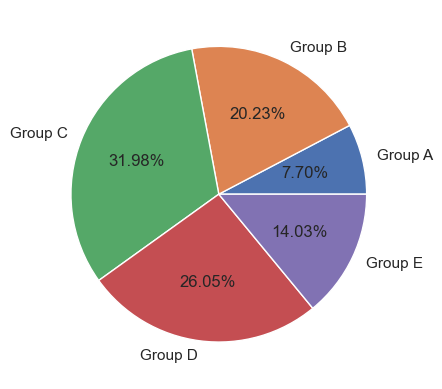

In [172]:
# Assuming GroupA, GroupB, GroupC, GroupD, and GroupE are counts (already calculated)
GroupA = df.loc[df["EthnicGroup"] == "group A"].shape[0]
GroupB = df.loc[df["EthnicGroup"] == "group B"].shape[0]
GroupC = df.loc[df["EthnicGroup"] == "group C"].shape[0]
GroupD = df.loc[df["EthnicGroup"] == "group D"].shape[0]
GroupE = df.loc[df["EthnicGroup"] == "group E"].shape[0]

# Create a list of counts
mlist = [GroupA, GroupB, GroupC, GroupD, GroupE]
print(mlist)

# Labels for the pie chart
labels = ["Group A", "Group B", "Group C", "Group D", "Group E"]

# Plot the pie chart
plt.pie(mlist, labels=labels, autopct="%1.2f%%")
plt.show()



[Text(0, 0, '9212'),
 Text(0, 0, '5826'),
 Text(0, 0, '2219'),
 Text(0, 0, '7503'),
 Text(0, 0, '4041')]

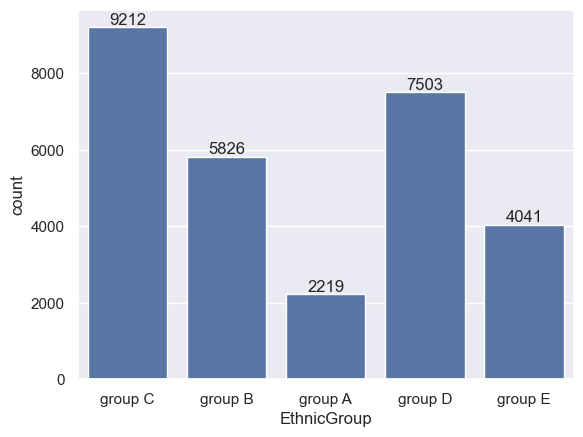

In [168]:
ax = sns.countplot(data = df, x = 'EthnicGroup')
ax.bar_label(ax.containers[0])